# Histograms - Part 3 - Histogram Eqaulization

## Loading and Showing Images

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dark_horse = cv2.imread('../DATA/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('../DATA/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('../DATA/bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

In [3]:
img = rainbow

In [4]:
img.shape

(550, 413, 3)

In [5]:
img.shape[:2]

(550, 413)

## Create a Mask

In [6]:
mask = np.zeros(img.shape[:2], np.uint8)

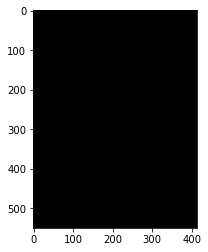

In [7]:
plt.imshow(mask, cmap='gray')

In [8]:
mask[300:400, 100:400] = 255

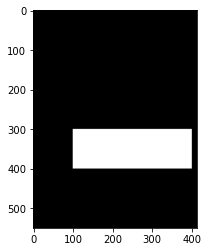

In [9]:
plt.imshow(mask, cmap='gray')

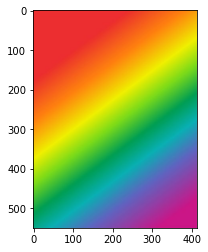

In [10]:
plt.imshow(show_rainbow)

In [11]:
masked_img = cv2.bitwise_and(img, img, mask=mask)

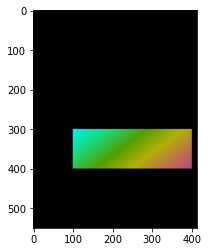

In [12]:
plt.imshow(masked_img)

In [13]:
show_masked_img = cv2.bitwise_and(show_rainbow, show_rainbow, mask=mask)

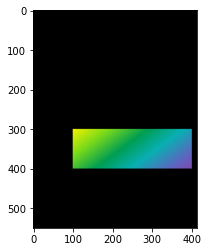

In [14]:
plt.imshow(show_masked_img)

## Plotting Histograms

In [15]:
hist_masked_values_red = cv2.calcHist([rainbow], channels=[2], mask=mask, histSize=[256], ranges=[0, 256])

In [16]:
hist_values_red = cv2.calcHist([rainbow], channels=[2], mask=None, histSize=[256], ranges=[0, 256])

Text(0.5, 1.0, 'Red Histogram for masked rainbow')

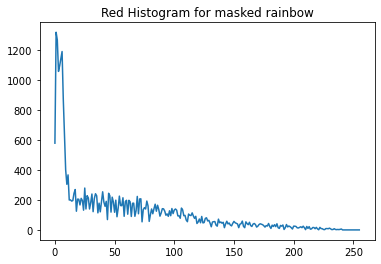

In [17]:
plt.plot(hist_masked_values_red)
plt.title('Red Histogram for masked rainbow')

Text(0.5, 1.0, 'Red Histogram for normal rainbow')

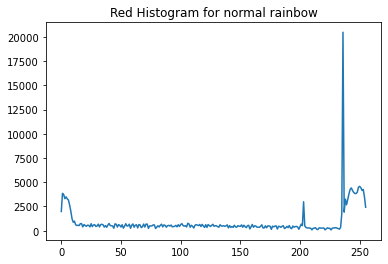

In [18]:
plt.plot(hist_values_red)
plt.title('Red Histogram for normal rainbow')

## Equalize Histograms

### Gray Scale Images

In [19]:
gorilla = cv2.imread('../DATA/gorilla.jpg', 0)

In [20]:
def display_img(img, cmap=None):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

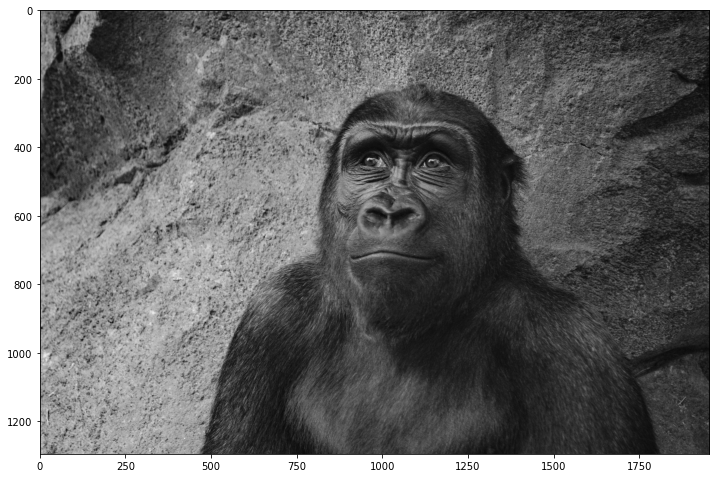

In [21]:
display_img(gorilla, 'gray')

In [22]:
gorilla.shape

(1295, 1955)

In [23]:
hist_values = cv2.calcHist([gorilla], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

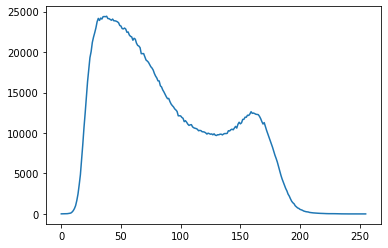

In [24]:
plt.plot(hist_values)

In [25]:
eq_gorilla = cv2.equalizeHist(gorilla)

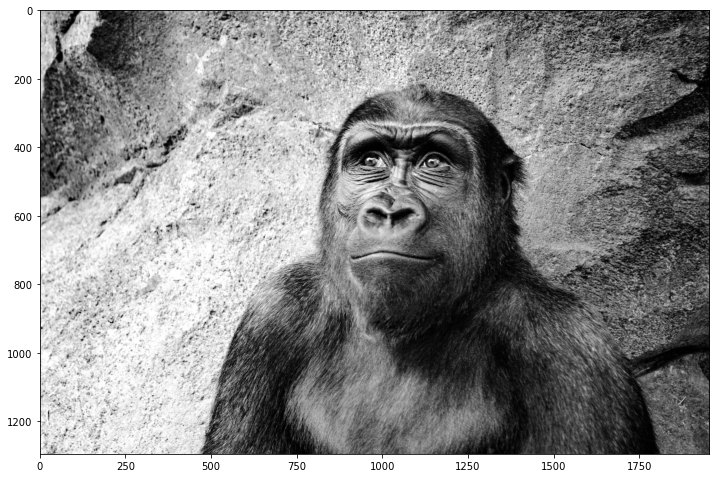

In [26]:
display_img(eq_gorilla, cmap='gray')

In [27]:
hist_values = cv2.calcHist([eq_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

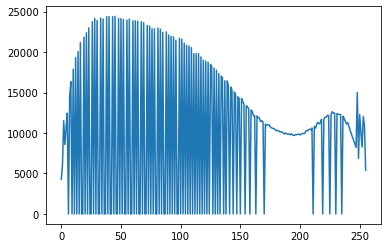

In [28]:
plt.plot(hist_values)

### Color Images

In [29]:
color_gorilla = cv2.imread('../DATA/gorilla.jpg')

In [30]:
show_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)

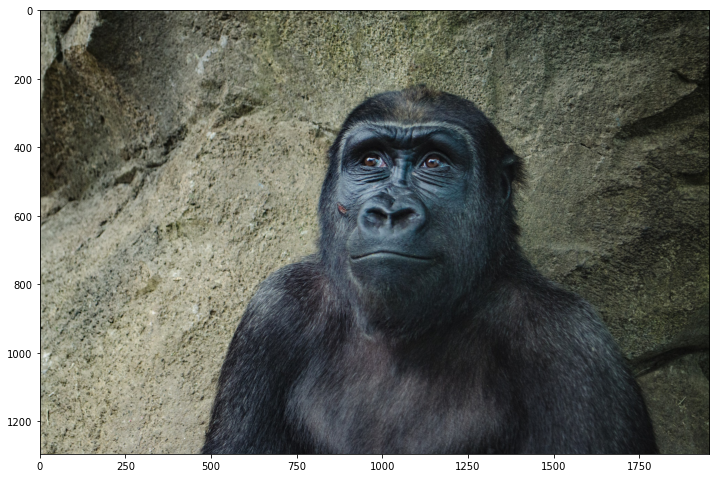

In [31]:
display_img(show_gorilla)

In [32]:
hsv_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

In [33]:
hsv_gorilla[:, :, 2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 197, 184, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [173, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [34]:
hsv_gorilla[:, :, 2].min()

0

In [35]:
hsv_gorilla[:, :, 2].max()

255

In [36]:
hsv_gorilla[:, :, 2] = cv2.equalizeHist(hsv_gorilla[:, :, 2])

In [37]:
eq_color_gorilla = cv2.cvtColor(hsv_gorilla, cv2.COLOR_HSV2RGB)

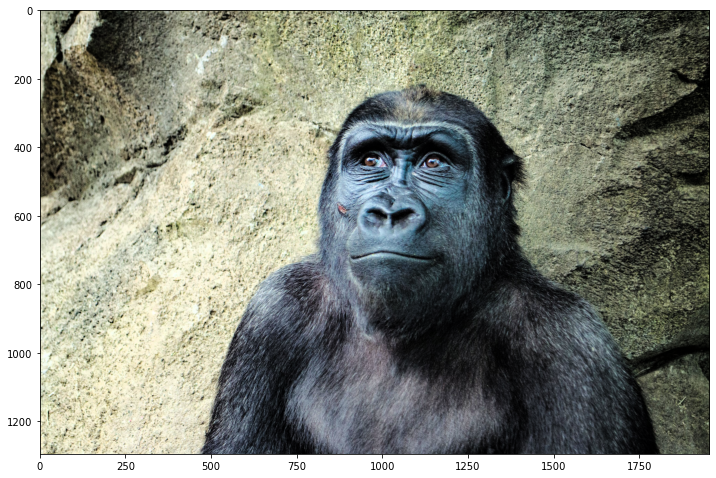

In [38]:
display_img(eq_color_gorilla)